# Backward Elimination

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
loans = pd.read_csv('loan_data.csv')
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [34]:
X = loans.iloc[:, :-1].values
y = loans.iloc[:, -1].values

### Handle categorical data

In [36]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X[:, 1] = labelencoder.fit_transform(X[:, 1])

In [37]:
onehotencoder = OneHotEncoder(categorical_features = [1])
X = onehotencoder.fit_transform(X).toarray()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [39]:
X.shape

(9578, 19)

In [40]:
X = X[:, 1:]

In [41]:
X.shape

(9578, 18)

### Split data

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

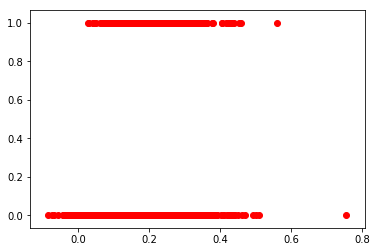

In [75]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)
plt.scatter(y_pred, y_test, color = 'red')

### Use backward elimination

In [66]:
import statsmodels.formula.api as sm
X = np.append(arr = np.ones((9578, 1)).astype(int), values = X, axis = 1)
#we need the above step because OLS from statsmodel does not include the intercept
List_aux = list(np.arange(0, 20))
X_opt = X[:, List_aux]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     39.73
Date:                Tue, 19 Mar 2019   Prob (F-statistic):          1.85e-106
Time:                        00:20:24   Log-Likelihood:                -3709.9
No. Observations:                9578   AIC:                             7450.
Df Residuals:                    9563   BIC:                             7557.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2333      0.026      8.904      0.000       0.182       0.285
x1             0.2333      0.026      8.904      0.000       0.182       0.285
x2             0.2333      0.026      8.904      0.000       0.182       0.285
x3             0.2333      0.026      8.904      0.000       0.182       0.285
x4             0.2333      0.026      8.904      0.000       0.182       0.285
x5             0.2333      0.026      8.904      0.000       0.182       0.285
x6            -0.0616      0.013     -4.838      0.000      -0.086      -0.037
x7            -0.0416      0.010     -4.250      0.000      -0.061      -0.022
x8             0.0138      0.021      0.667      0.505      -0.027       0.054
x9             0.0158      0.016      0.972      0.331      -0.016       0.048
x10           -0.0372      0.019     -1.995      0.046      -0.074      -0.001
x11            0.0902      0.017      5.328      0.000       0.057       0.123
x12           -0.0999      0.010     -9.853      0.000      -0.120      -0.080
x13            0.3559      0.231      1.538      0.124      -0.098       0.810
x14            0.0001   2.29e-05      6.286      0.000    9.89e-05       0.000
x15           -0.0460      0.007     -6.223      0.000      -0.060      -0.031
x16        -6.968e-05      0.001     -0.121      0.904      -0.001       0.001
x17           -0.0010      0.000     -6.408      0.000      -0.001      -0.001
x18          2.31e-06   1.63e-06      1.419      0.156   -8.82e-07     5.5e-06
x19         3.694e-07   1.24e-07      2.984      0.003    1.27e-07    6.12e-07
==============================================================================
Omnibus:                     2619.874   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5352.136
Skew:                           1.708   Prob(JB):                         0.00
Kurtosis:                       4.322   Cond. No.                     5.13e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.21e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [67]:
SL = .05

In [68]:
while True:
    X_opt = X[:, List_aux]
    regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
    max_p_value = np.max(regressor_OLS.pvalues)
    print(max_p_value)
    if max_p_value > SL:
        indx=np.argmax(regressor_OLS.pvalues)
        List_aux.pop(indx)
        print(List_aux)
    else:
        break

0.9038852754678619
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19]
0.5039074311110119
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19]
0.3767503133403056
[0, 1, 2, 3, 4, 5, 6, 7, 10, 11, 12, 13, 14, 15, 17, 18, 19]
0.14749171886423407
[0, 1, 2, 3, 4, 5, 6, 7, 10, 11, 12, 13, 14, 15, 17, 19]
0.1071109602021506
[0, 1, 2, 3, 4, 5, 6, 7, 10, 11, 12, 14, 15, 17, 19]
0.022482954371853024


In [69]:
X_opt = X[:, List_aux]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()    

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     61.14
Date:                Tue, 19 Mar 2019   Prob (F-statistic):          1.65e-109
Time:                        00:21:34   Log-Likelihood:                -3712.9
No. Observations:                9578   AIC:                             7446.
Df Residuals:                    9568   BIC:                             7517.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2546      0.017     15.254      0.000       0.222       0.287
x1             0.2546      0.017     15.254      0.000       0.222       0.287
x2             0.2546      0.017     15.254      0.000       0.222       0.287
x3             0.2546      0.017     15.254      0.000       0.222       0.287
x4             0.2546      0.017     15.254      0.000       0.222       0.287
x5             0.2546      0.017     15.254      0.000       0.222       0.287
x6            -0.0669      0.012     -5.609      0.000      -0.090      -0.044
x7            -0.0463      0.009     -5.274      0.000      -0.063      -0.029
x8            -0.0415      0.018     -2.282      0.022      -0.077      -0.006
x9             0.0910      0.016      5.697      0.000       0.060       0.122
x10           -0.1009      0.010    -10.006      0.000      -0.121      -0.081
x11            0.0002   2.05e-05      7.817      0.000       0.000       0.000
x12           -0.0434      0.007     -6.157      0.000      -0.057      -0.030
x13           -0.0012      0.000    -11.312      0.000      -0.001      -0.001
x14         3.859e-07    1.2e-07      3.212      0.001     1.5e-07    6.21e-07
==============================================================================
Omnibus:                     2625.684   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5372.050
Skew:                           1.710   Prob(JB):                         0.00
Kurtosis:                       4.327   Cond. No.                     2.55e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.11e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""